# simple visualization Using Pandas, Matplotlib, Seaborn

In [1]:
# google drive connections
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Data Visualization/telco_customer.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# data ini memprediksi untuk customer churn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Scatter plot (data dua duanya harus numeric): Tenue dan Monthly charges

### Plot Pandas

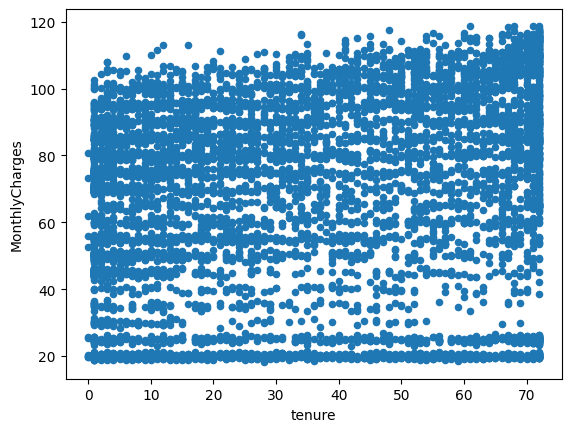

In [10]:
# membuat scatter sederhana dengan pandas
df.plot(x='tenure', y='MonthlyCharges', kind='scatter');

### Plot Matplotlib

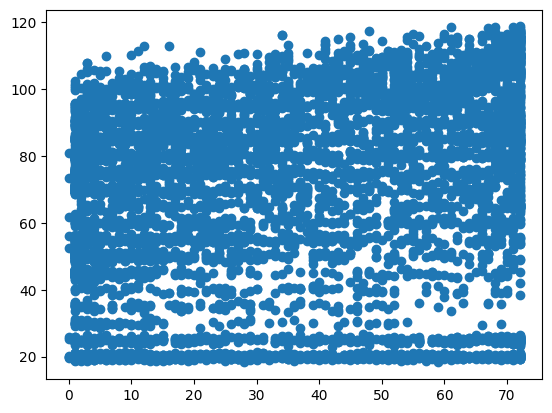

In [11]:
plt.scatter(x='tenure', y='MonthlyCharges', data=df);

### Plot seaborn

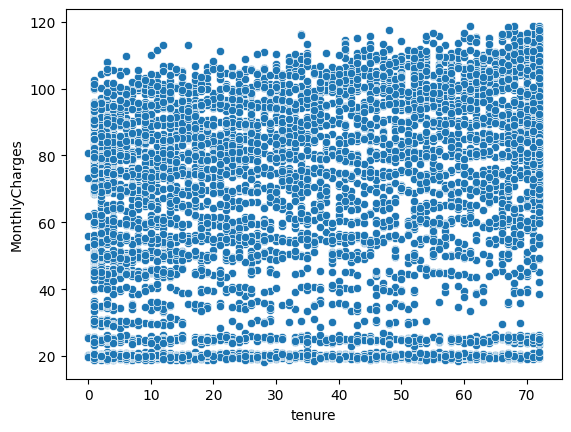

In [12]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df);

In [14]:
# Menggunakan sampling untuk mengatasi overlappig plot
df.shape

(7043, 21)

In [15]:
# random state: suatu nilai untuk menyamakan nilai randomnya
# kalo misal kita ngerjain data yang random 14, datanya itu sama
df_sample = df.sample(700, random_state=14)

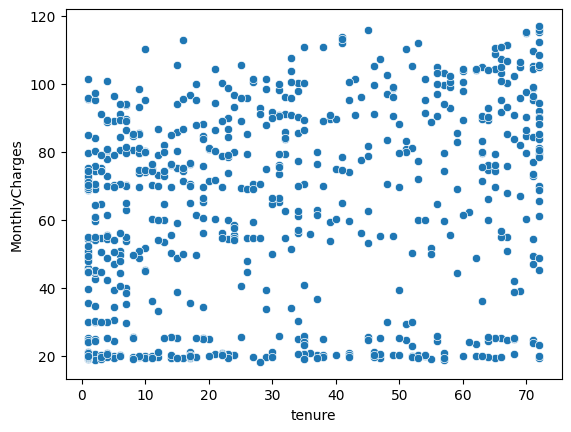

In [16]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df_sample);

## Histogram: Find Distribution of MonthlyCharges

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# challange
# buatkan visualisasi distribusi dari MonthlyCharges
# menggunakan padas, matplotlib, seaborn

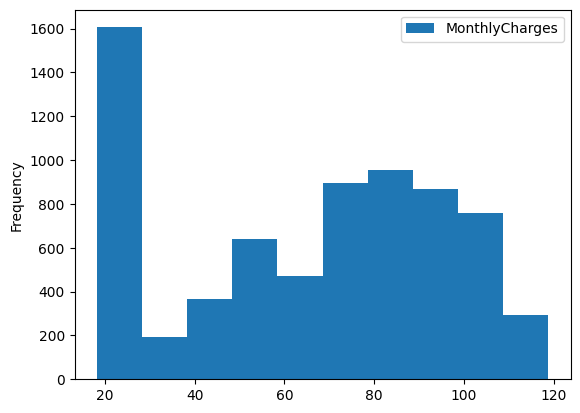

In [23]:
# pandas
df.plot(y='MonthlyCharges', kind='hist');

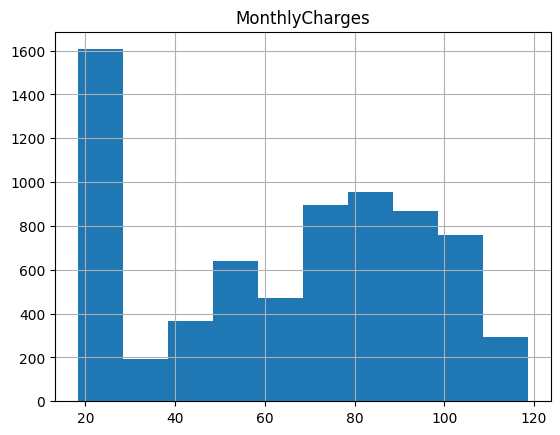

In [31]:
df.hist('MonthlyCharges');

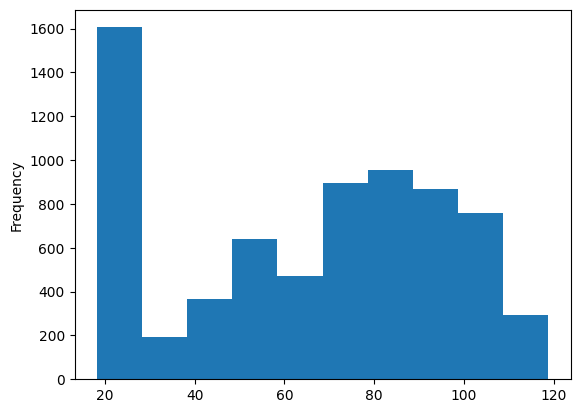

In [33]:
df['MonthlyCharges'].plot(kind='hist');

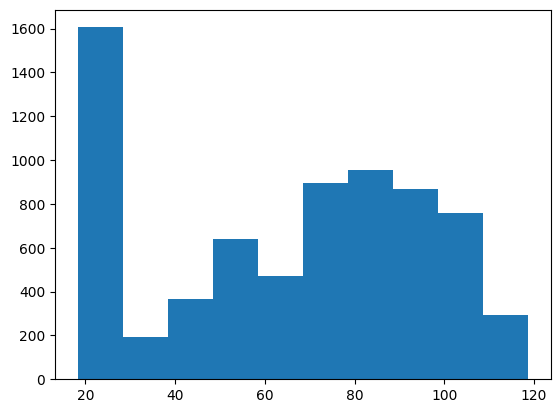

In [26]:
# Matplotlib
plt.hist(x='MonthlyCharges', data=df);

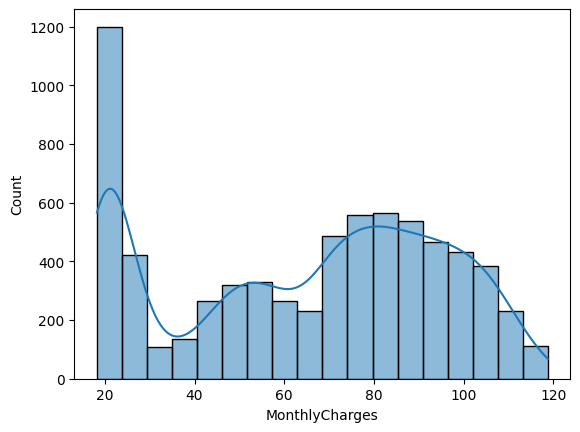

In [34]:
# Seaborn
sns.histplot(x='MonthlyCharges', data=df, kde=True);

## Bloxplot (melihat data yang outlier): Tenure

### Pandas

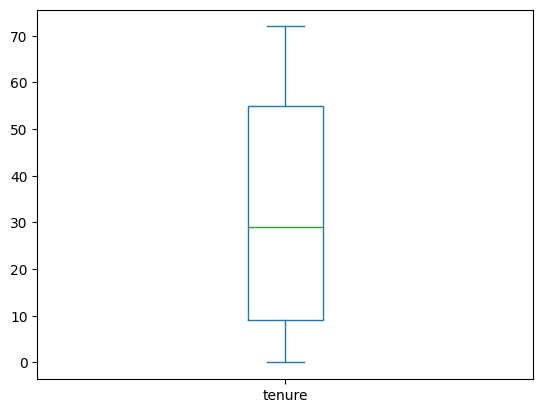

In [36]:
df['tenure'].plot(kind='box');

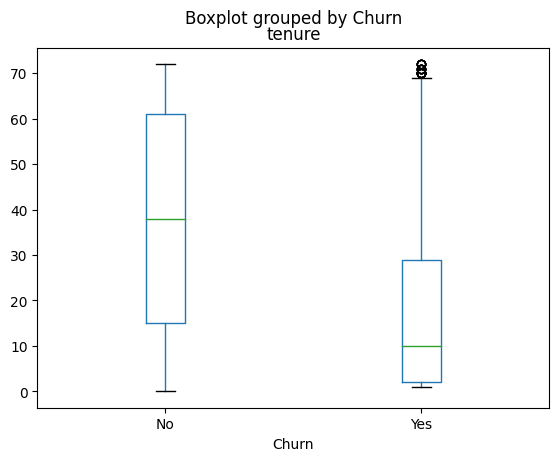

In [40]:
df.boxplot(column='tenure', by='Churn', grid=False);

### Matplotlib

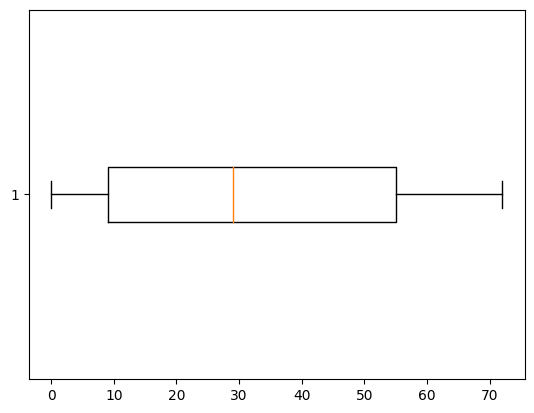

In [42]:
plt.boxplot(x='tenure', data=df, vert=False);

### Seaborn

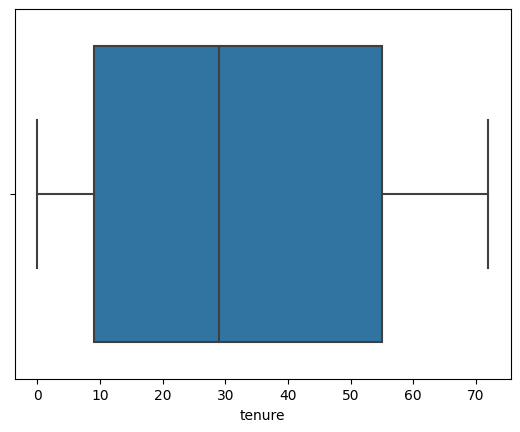

In [45]:
sns.boxplot(x='tenure', data=df);

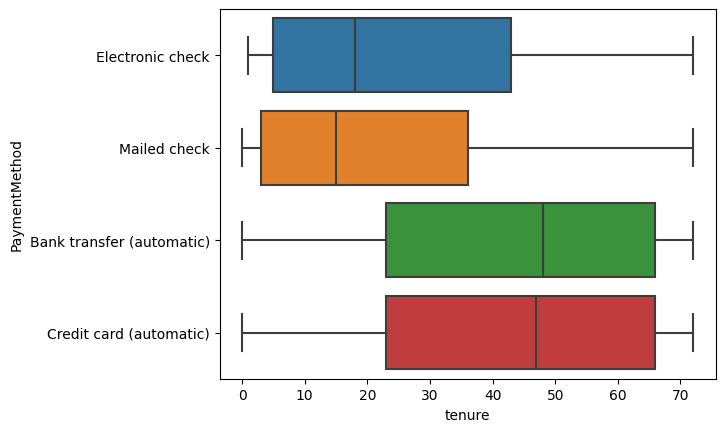

In [48]:
sns.boxplot(x='tenure', y='PaymentMethod', data=df);

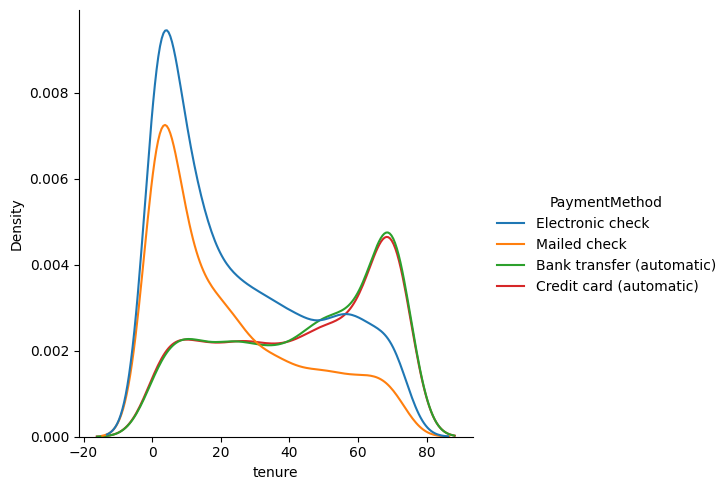

In [51]:
sns.displot(x='tenure', hue='PaymentMethod', data=df, kind='kde');

## Barplot: Compare average MonthlyCharges by PaymentMethod

### Pandas

In [54]:
dfg = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
dfg

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


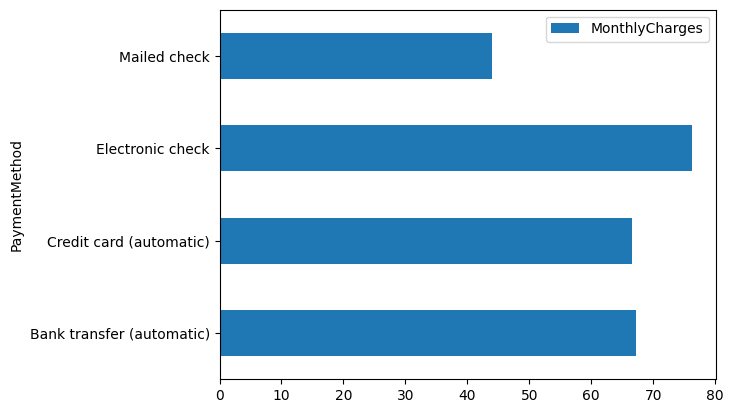

In [56]:
dfg.plot(x='PaymentMethod', y='MonthlyCharges', kind='barh');

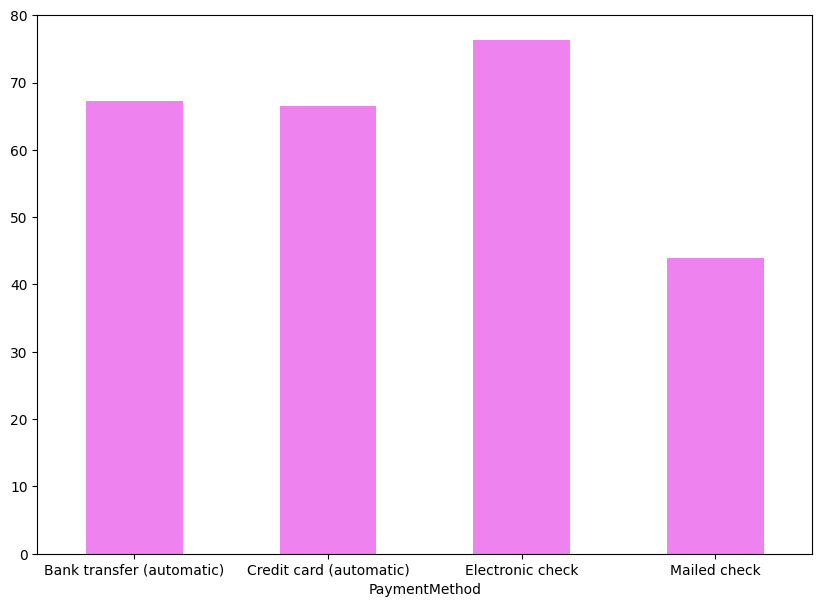

In [61]:
dfg.plot(x='PaymentMethod', y='MonthlyCharges', kind='bar', 
         color='violet',
         legend=False,
         rot=0,
         figsize=(10, 7));

### Matplotlib

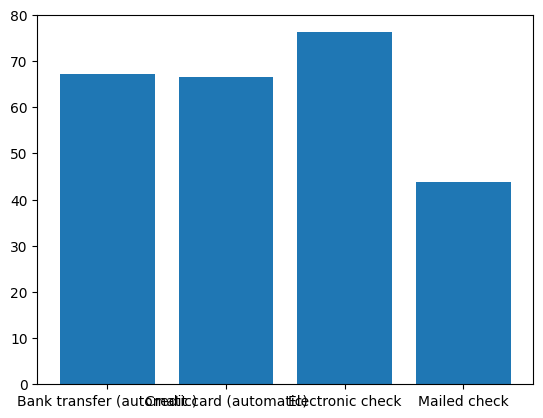

In [63]:
plt.bar(x='PaymentMethod', height='MonthlyCharges', data=dfg,);

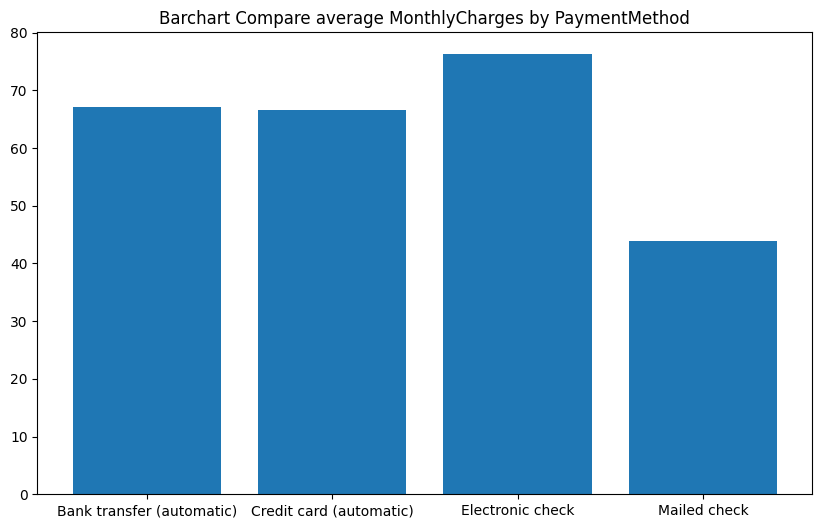

In [67]:
plt.figure(figsize=(10,6))
plt.bar(x='PaymentMethod', height='MonthlyCharges', data=dfg);
plt.title('Barchart Compare average MonthlyCharges by PaymentMethod')
plt.show()

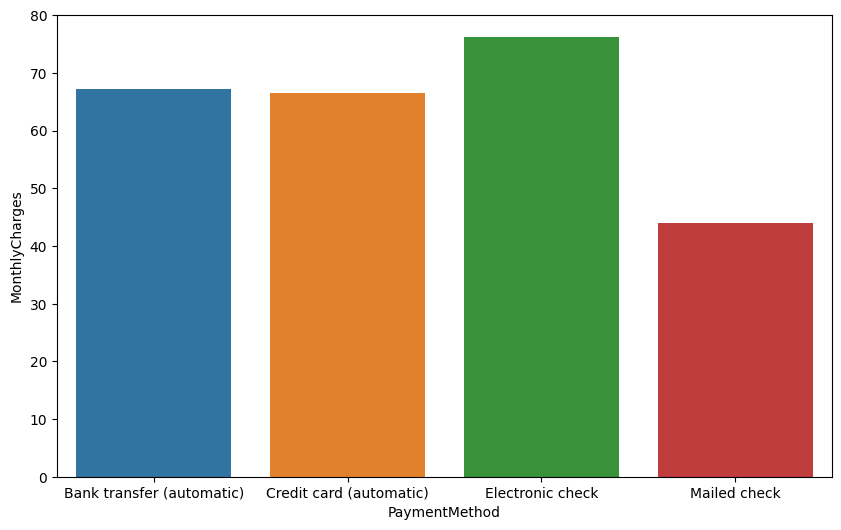

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=dfg);

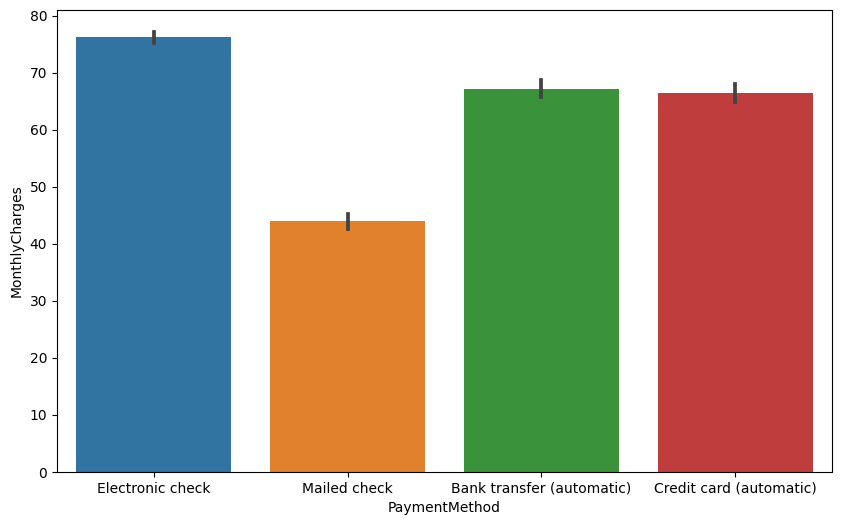

In [74]:
# Agregasi langsung di dalam plot menggunakan seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', estimator='mean' ,data=df);

<Axes: xlabel='PaymentMethod', ylabel='count'>

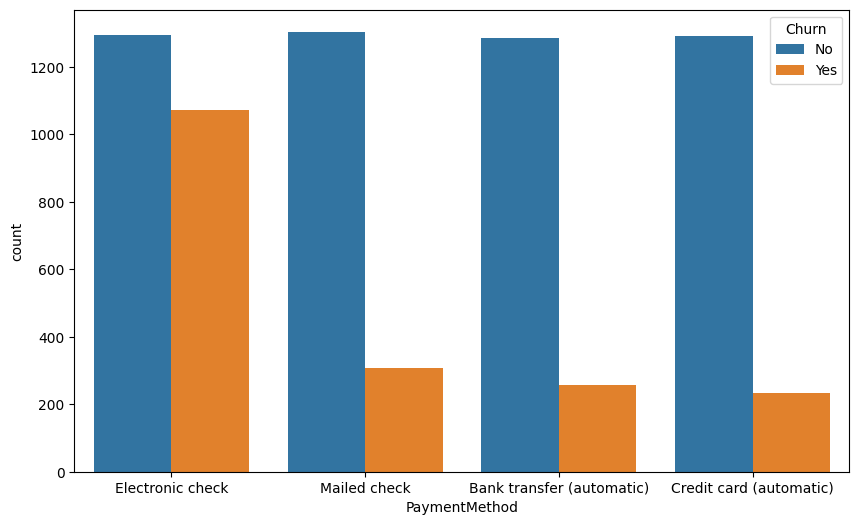

In [76]:
# Countplot in seaborn
# hanya digunakan apabila estimatornya bernilai count
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

In [78]:
url_degree = '/content/drive/MyDrive/Colab Notebooks/MSIB/Pengenalan Python untuk Data Science/PDA_DataSource/Data Visualization/percent-bachelors-degrees-women-usa.csv'
data = pd.read_csv(url_degree)
data.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Challenge:
- Buatkan boxplot untuk kategori Engineering, Computer Science, Architecture

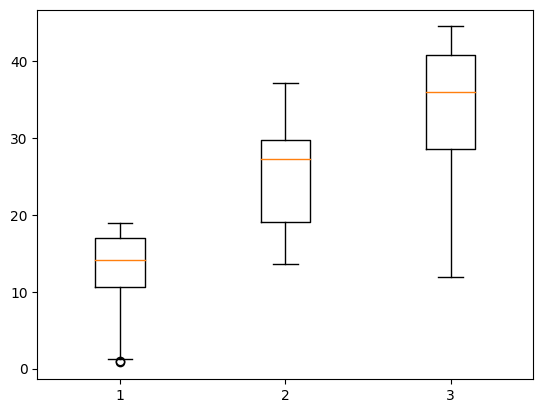

In [86]:
plt.boxplot(x=data[['Engineering', 'Computer Science', 'Architecture']], data=data);

<Axes: >

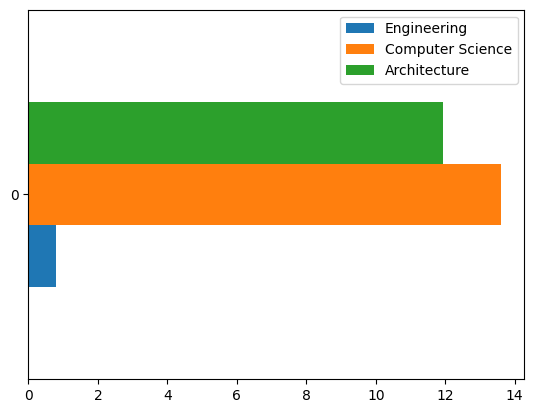

In [92]:
data[data['Year'] == 1970][['Engineering', 'Computer Science', 'Architecture']].plot(kind='barh')

<Axes: >

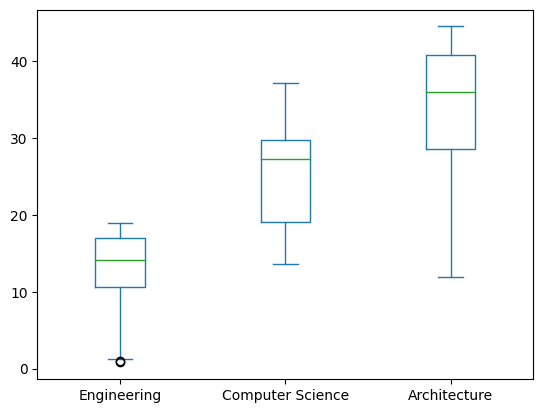

In [94]:
# cara kak Fajri
selected = ['Engineering', 'Computer Science', 'Architecture']

#pandas
data[selected].plot(kind='box')

<Axes: >

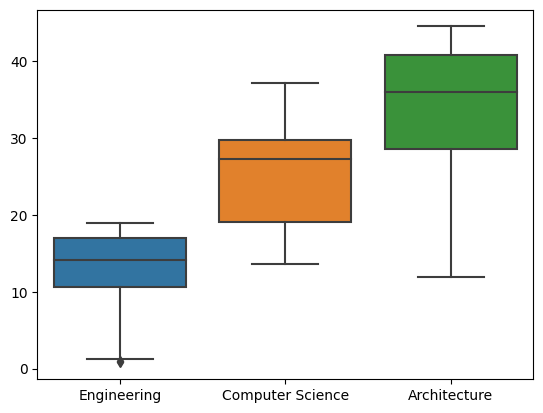

In [97]:
sns.boxplot(data[selected])

In [98]:
year_data = data[data['Year']== 1970][selected]
year_data

,Engineering,Computer Science,Architecture
0,0.8,13.6,11.921005


<Axes: >

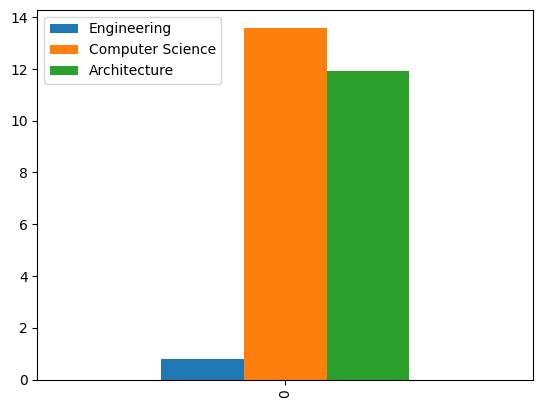

In [100]:
year_data.plot(kind='bar')

## Multi-Bar: Average tenure by payment method

<Axes: xlabel='tenure', ylabel='PaymentMethod'>

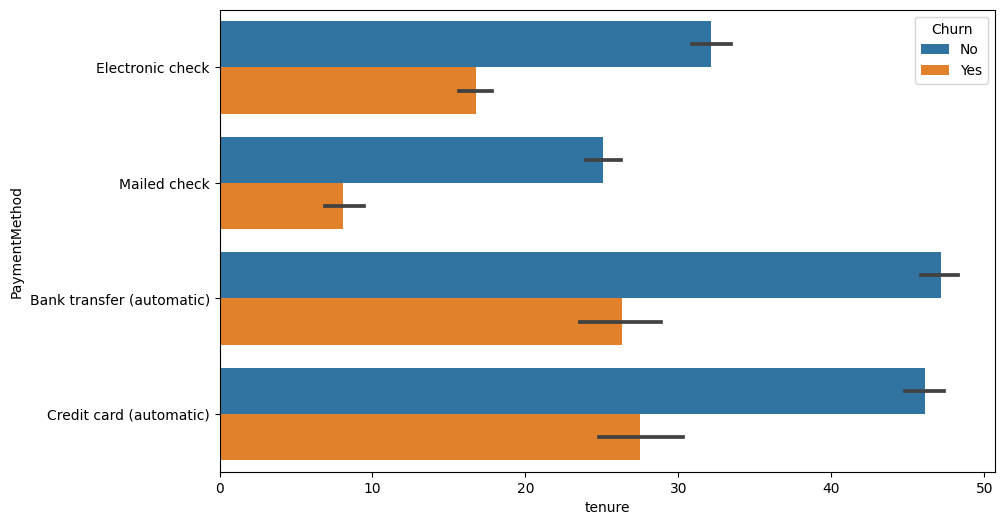

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(x='tenure', y='PaymentMethod', hue='Churn', data=df)

### Save Plot

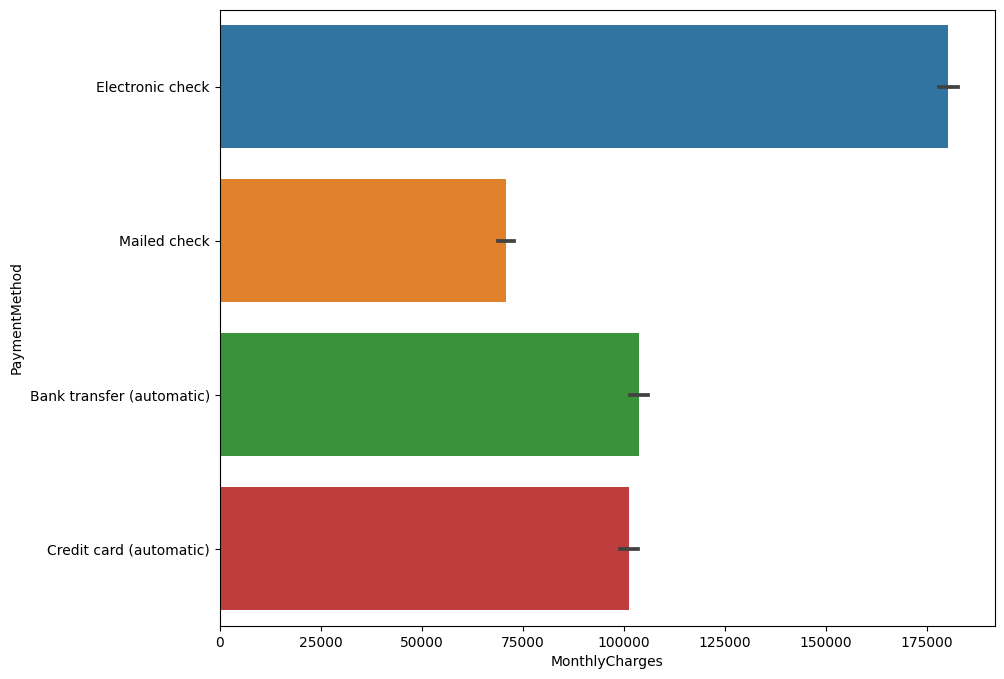

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(x='MonthlyCharges', y='PaymentMethod', data=df, estimator='sum')

#save plot
plt.savefig('barplot.png')

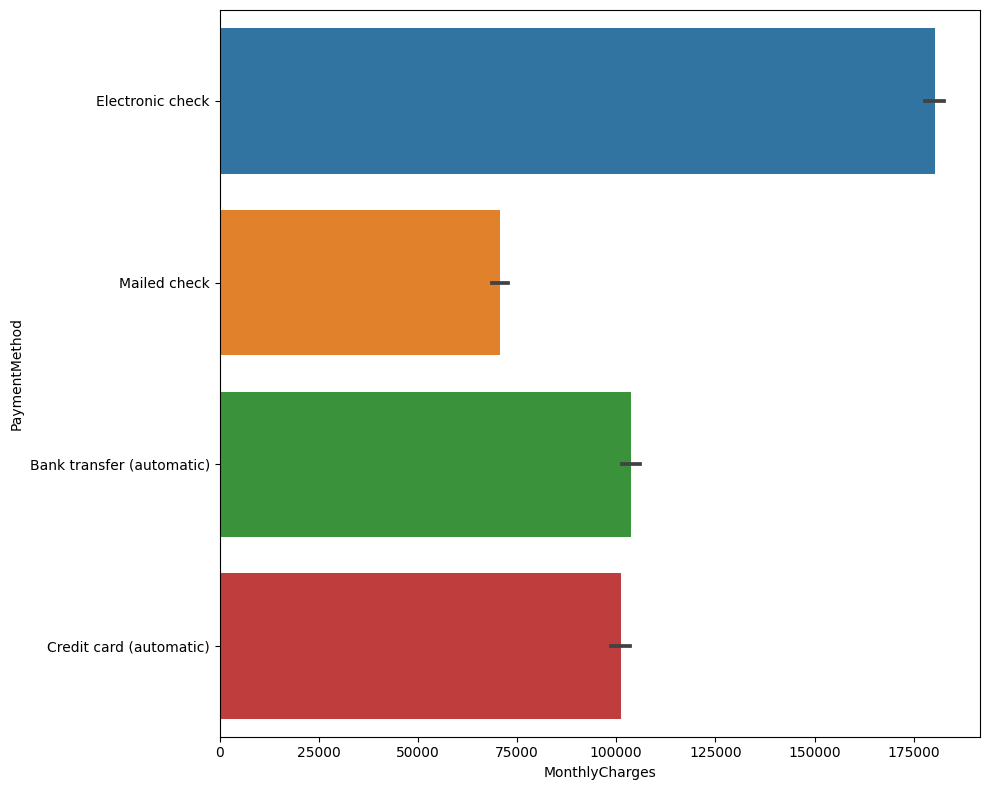

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x='MonthlyCharges', y='PaymentMethod', data=df, estimator='sum')

#save plot
plt.tight_layout()
plt.savefig('barplot.png', dpi=200)

### Lineplot

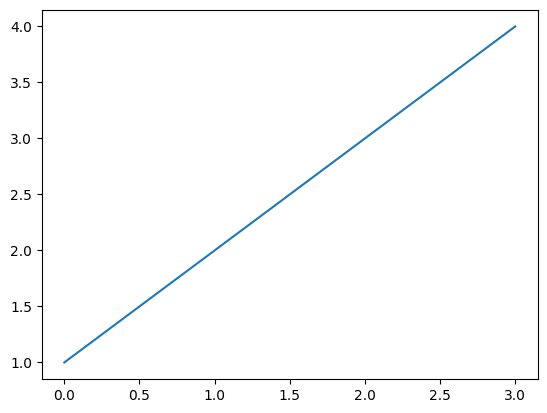

In [108]:
plt.plot([1, 2, 3, 4])

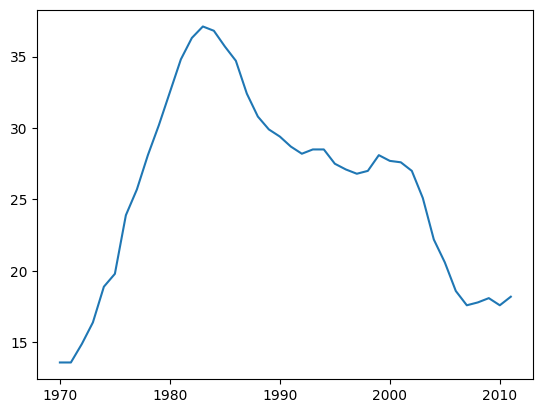

In [109]:
plt.plot('Year', 'Computer Science', data=data);

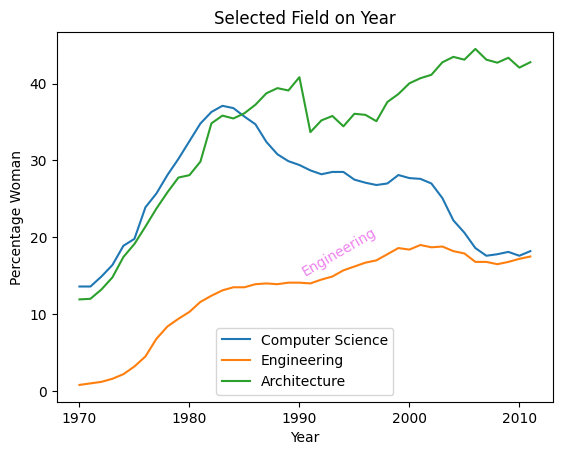

In [112]:
plt.plot('Year', 'Computer Science', data=data);
plt.plot('Year', 'Engineering', data=data);
plt.plot('Year', 'Architecture', data=data);
plt.legend(loc='lower center');
plt.title('Selected Field on Year');
plt.xlabel('Year')
plt.ylabel('Percentage Woman')
plt.text(x=1990, y=15, s='Engineering', rotation=30, color='violet')
plt.show()